In [1]:
from src.e0_load_tr_de_spu import get_spu
import pandas as pd
import os
import numpy as np

# dev get_grid2nbh_ratio

In [2]:
grid = get_spu('grid_50')

In [3]:
bnia = get_spu('bnia_nbh')

In [4]:
import geopandas as gp
%matplotlib inline

In [5]:
joined = gp.sjoin(grid, bnia)

In [6]:
joined.shape, grid.shape, bnia.shape

((90893, 8), (95956, 4), (55, 4))

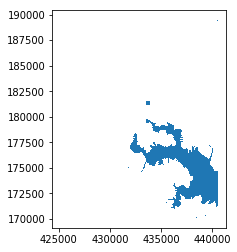

In [7]:
grid[~grid.index.isin(joined.index)].plot()

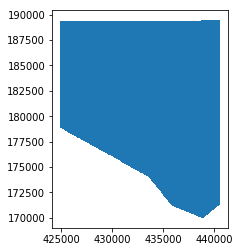

In [13]:
grid.plot()

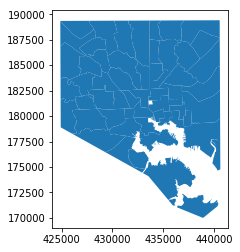

In [15]:
bnia.plot()

In [8]:
pairs = joined['index_right'].reset_index()

In [9]:
num_bh_per_grid = pairs.groupby('index').size()

In [10]:
import pandas as pd

In [11]:
ratio = pairs[pairs['index'].isin(num_bh_per_grid[num_bh_per_grid==1].index)].copy()
ratio.columns = ['grid', 'nbh']
ratio['ratio'] = 1

In [12]:
more_ratio = []
for gidx in num_bh_per_grid[num_bh_per_grid!=1].index:
#     print(pairs[pairs['index']==gidx])
    g = grid.loc[gidx].geometry
    garea = g.area
    for nbhidx in pairs[pairs['index']==gidx].index_right.values:
        nbh = bnia.loc[nbhidx].geometry
        more_ratio.append({'grid': gidx, 'nbh': nbhidx, 'ratio': g.intersection(nbh).area/garea})
#     break

In [13]:
more_ratio_df = pd.DataFrame(more_ratio)

In [83]:
ratio_all = ratio.append(more_ratio_df,ignore_index=True)

In [47]:
def get_grid2nbh_ratio(grid_name, nbh_name, to_csv=False):
    grid = get_spu(grid_name)
    nbh = get_spu(nbh_name)
    joined = gp.sjoin(grid, nbh)
    pairs = joined['index_right'].reset_index()
    num_bh_per_grid = pairs.groupby('index').size()
    ratio = pairs[pairs['index'].isin(num_bh_per_grid[num_bh_per_grid==1].index)].copy()
    ratio.columns = ['grid', 'nbh']
    ratio['ratio'] = 1
    more_ratio = []
    for gidx in num_bh_per_grid[num_bh_per_grid!=1].index:
    #     print(pairs[pairs['index']==gidx])
        g = grid.loc[gidx].geometry
        garea = g.area
        for nbhidx in pairs[pairs['index']==gidx].index_right.values:
            nbh = bnia.loc[nbhidx].geometry
            more_ratio.append({'grid': gidx, 'nbh': nbhidx, 'ratio': g.intersection(nbh).area/garea})
    #     break
    more_ratio_df = pd.DataFrame(more_ratio)
    ratio = ratio.append(more_ratio_df,ignore_index=True)
    if to_csv:
        ratio.to_csv('data/spu/%s_to_%s.csv' % (grid_name, nbh_name))
    return ratio

In [48]:
ratio_func = get_grid2nbh_ratio('grid_50', 'bnia_nbh')

In [90]:
bnia.index.unique()

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54],
           dtype='int64', name='index_right')

In [91]:
set(ratio_func.nbh)==set(bnia.index)

True

# end dev get_grid2nbh_ratio

# dev grid2bnia

In [58]:
grid_stats_arr = np.random.randint(0, 8, grid.shape[0])

In [59]:
grid_stats_arr.sum(), (grid_stats_arr!=0).sum()

(334778, 83886)

In [85]:
grid_stats = pd.Series(grid_stats_arr, index=grid.index, name='stat')
stats = grid_stats.to_frame().merge(ratio_all,left_index=True, right_on='grid')
kind='sum'
if kind=='count':
        stats.iloc[:,0] = stats.iloc[:,0]>1e-7
stats.groupby('nbh').apply(lambda x: sum(x.iloc[:,0]*x.ratio)).sum()

299898.41966821824

In [79]:
def grid2bnia(grid_stats, grid_name='grid_50', nbh_name='bnia_nbh', kind='sum'):
    path = 'data/spu/%s_to_%s.csv' % (grid_name, nbh_name)
    if os.path.exists(path):
        ratio = pd.read_csv(path,index_col=0)
    else:
        ratio = get_grid2nbh_ratio(grid_name, nbh_name, to_csv=True)
    print(ratio)
    stats = grid_stats.to_frame().merge(ratio,left_index=True, right_on='grid')
    if kind=='count':
        stats.iloc[:,0] = stats.iloc[:,0]>1e-7
    return stats.groupby('nbh').apply(lambda x: sum(x.iloc[:,0]*x.ratio))  

In [82]:
ratio

,grid,nbh,ratio
0,0,3,1
1,1,3,1
2,2,3,1
3,3,3,1
4,4,3,1
5,5,3,1
6,6,3,1
7,7,3,1
8,8,3,1
9,9,3,1


In [81]:
bnia_stats

nbh
0      8022.288625
1      6462.930896
2      5901.310442
3     24825.000000
4      1942.030534
5      9258.473391
6      4113.563105
7      2670.647239
8      7954.445552
9      3031.390279
10     5010.792977
11     4742.321050
12     4371.072307
13     2711.829959
14     3062.635048
15     1811.067538
16     4854.408323
17     6182.384058
18     3564.700105
19     2969.592058
20     4428.560398
21     7251.632694
22     5436.267278
23     5830.097927
24     8821.968749
25     1484.759363
26     8189.231862
27     3542.680121
28     6547.284366
29     5760.039532
30     1156.798788
31     8118.151820
32     2414.291078
33     8923.436891
34     7593.078976
35     9887.759884
36     6770.479988
37    11889.682732
38     1853.378751
39     5141.491911
40     3962.058560
41     1212.137959
42     3012.905582
43     6762.167309
44    15446.772449
45     3649.729971
46     5000.491295
47     2623.494422
48     5247.320926
49     6123.804281
50     3264.917059
51     1395.731193
52     2